In [3]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [4]:
# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

In [5]:
# File to Load (Remember to Change These)
mouse_drug = pd.read_csv("mouse_drug_data.csv")
clinical_trial = pd.read_csv("clinicaltrial_data.csv")

In [6]:
# Read the Mouse Data
mouse_drug.head()

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [7]:
# Read the Drug Data and the Clinical Trial Data
clinical_trial.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [8]:
# Combine the data into a single dataset
drug_results = pd.merge(mouse_drug, clinical_trial, on = ['Mouse ID'])

In [9]:
# Display the data table for preview
drug_results.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


In [10]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
# Convert to DataFrame
# Preview DataFrame 

drug_results = pd.DataFrame({'Drug' : drug_results['Drug'], 
                             'Timepoint' : drug_results['Timepoint'], 
                            'Tumor Volume (mm3)' : drug_results['Tumor Volume (mm3)']})

drug_results_mean = drug_results.groupby(['Drug', 'Timepoint'])
drug_results_mean.mean()

drug_tumor_sum = pd.DataFrame(drug_results_mean.mean().reset_index())
drug_tumor_sum.head(100)





,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [11]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
# Convert to DataFrame
# Preview DataFrame

sem_drug = drug_tumor_sum.groupby('Drug').sem()

drug_results_mean = drug_results.groupby(['Drug', 'Timepoint']).sem()
drug_results_mean

#Convert the grouped object into a dataframe and then display a preview
drug_tumor_sem = pd.DataFrame(drug_results)
drug_tumor_sem.head(3)


,Drug,Timepoint,Tumor Volume (mm3)
0,Stelasyn,0,45.000000
1,Stelasyn,5,47.313491
2,Stelasyn,10,47.904324


In [12]:
#renaming Tumor Volume column
drug_tumor_sem.columns = ['Drug', 'Timepoint', 'SEM Volume']
drug_tumor_sem.head(3)


,Drug,Timepoint,SEM Volume
0,Stelasyn,0,45.000000
1,Stelasyn,5,47.313491
2,Stelasyn,10,47.904324


In [27]:
#capomulin
capo_sem = drug_tumor_sem.groupby('Drug').mean().reset_index()
capo_sem.query('Drug == "Capomulin"')[['SEM Volume']].iloc[0][0]


40.67574114103175

In [28]:
#Ceftamin
ceft_sem = drug_tumor_sem.groupby('Drug').mean().reset_index()
ceft_sem.query('Drug == "Ceftamin"')[['SEM Volume']].iloc[0][0]

52.59117180916796

In [29]:
#Infubinol
infub_sem = drug_tumor_sem.groupby('Drug').mean().reset_index()
infub_sem.query('Drug == "Infubinol"')[['SEM Volume']].iloc[0][0]

52.95793475674497

In [30]:
#Ketapril
keta_sem = drug_tumor_sem.groupby('Drug').mean().reset_index()
keta_sem.query('Drug == "Ketapril"')[['SEM Volume']].iloc[0][0]

55.23563764033725

In [31]:
#Naftisol
naft_sem = drug_tumor_sem.groupby('Drug').mean().reset_index()
naft_sem.query('Drug == "Naftisol"')[['SEM Volume']].iloc[0][0]

54.33156465819461

In [32]:
#Placebo
placebo_sem = drug_tumor_sem.groupby('Drug').mean().reset_index()
placebo_sem.query('Drug == "Placebo"')[['SEM Volume']].iloc[0][0]

54.03358078622871

In [33]:
#Propriva
prop_sem = drug_tumor_sem.groupby('Drug').mean().reset_index()
prop_sem.query('Drug == "Propriva"')[['SEM Volume']].iloc[0][0]

52.322552035621115

In [34]:
#Ramicane
rami_sem = drug_tumor_sem.groupby('Drug').mean().reset_index()
rami_sem.query('Drug == "Ramicane"')[['SEM Volume']].iloc[0][0]

40.2167450669171

In [35]:
#Stelasyn
stela_sem = drug_tumor_sem.groupby('Drug').mean().reset_index()
stela_sem.query('Drug == "Stelasyn"')[['SEM Volume']].iloc[0][0]

54.10635695447114

In [36]:
#Zoniferol
zoni_sem = drug_tumor_sem.groupby('Drug').mean().reset_index()
zoni_sem.query('Drug == "Stelasyn"')[['SEM Volume']].iloc[0][0]

54.10635695447114

In [37]:
# Minor Data Munging to Re-Format the Data Frames
# Preview that Reformatting worked

#Pivot the AVG volume dataframe so that the drugs are the columns and the index is the timepoint
drug_tumor_avg = drug_tumor_sum.pivot(index='Timepoint', columns = 'Drug', values = 'Tumor Volume (mm3)')
drug_tumor_avg.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [26]:
#Capomulin
capo_means = drug_tumor_avg[['Capomulin']].mean()[0]
capo_means

40.48508402745415

In [38]:
#Ceftamin
ceft_means = drug_tumor_avg[['Ceftamin']].mean()[0]
ceft_means

53.7524335445471

In [39]:
#Infubinol
infub_means = drug_tumor_avg[['Infubinol']].mean()[0]
infub_means

54.963549459264

In [40]:
#Ketapril
keta_means = drug_tumor_avg[['Ketapril']].mean()[0]
keta_means

56.80690648909384

In [41]:
#Naftisol
naft_means = drug_tumor_avg[['Naftisol']].mean()[0]
naft_means

55.89102364545802

In [42]:
#Placebo
placebo_means = drug_tumor_avg[['Placebo']].mean()[0]
placebo_means

56.01220866112267

In [43]:
#Propriva
prop_means = drug_tumor_avg[['Propriva']].mean()[0]
prop_means

54.91193400153871

In [45]:
#Ramicane
rami_means = drug_tumor_avg[['Ramicane']].mean()[0]
rami_means

39.986931118829524

In [46]:
#Stelasyn
stela_means = drug_tumor_avg[['Stelasyn']].mean()[0]
stela_means

55.98163558232932

In [47]:
#Zoniferol
zoni_means = drug_tumor_avg[['Zoniferol']].mean()[0]
zoni_means

54.66045102256135

In [49]:
drug_tumor_sem.head()

,Drug,Timepoint,SEM Volume
0,Stelasyn,0,45.000000
1,Stelasyn,5,47.313491
2,Stelasyn,10,47.904324
3,Stelasyn,15,48.735197
4,Stelasyn,20,51.112713


In [64]:
table_mean = drug_results_mean.pivot_table(values ="Tumor Volume (mm3)", index ="Timepoint", columns ="Drug")
table_sem = drug_tumor_sem.pivot_table(values ="SEM Volume", index ="Timepoint", columns ="Drug")

df1 = table_mean[["Capomulin","Infubinol","Ketapril","Placebo"]]# make a new data frame with selected columns
df2 = table_sem[["Capomulin","Infubinol","Ketapril","Placebo"]]
table_mean.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


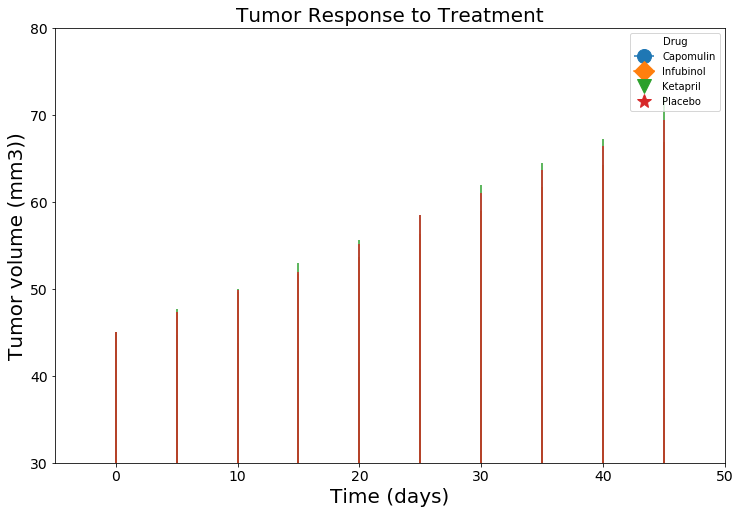

In [65]:
# Generate the Plot (with Error Bars)
# Save the Figure

ax = df1.plot(figsize=(12,8), yerr = df2, legend = False)
#reset color cycle so that the marker colors match
ax.set_prop_cycle(None)
#plot the markers
df1.plot(figsize=(12,8), style=['o--', 'D-', 'v', '*'], markersize=14, ax = ax)

plt.title("Tumor Response to Treatment").set_size(20)
plt.xlabel("Time (days)")
plt.ylabel("Tumor volume (mm3))")
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)
plt.xlim(-5, 50)
plt.ylim(30, 80)

plt.savefig("tumor_response.png")

In [66]:
#show the figure
plt.show()

In [61]:
#Metastatic Response to Treatment
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
# Convert to DataFrame
# Preview DataFrame


met_mean = drug_results.groupby(["Drug", "Timepoint"])["Metastatic Sites"].mean().reset_index()
met_mean.head()


KeyError: 'Column not found: Metastatic Sites'

In [62]:
 # Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame

met_sem = drug_results.groupby(["Drug", "Timepoint"])["Metastatic Sites"].sem().reset_index()
met_sem.head()

KeyError: 'Column not found: Metastatic Sites'

In [67]:
met_mean = met_mean.pivot_table(values ="Metastatic Sites", index ="Timepoint", columns ="Drug")
met_sme = met_sem.pivot_table(values ="Metastatic Sites", index ="Timepoint", columns ="Drug")
met_mean.head()

df3 = met_mean[["Capomulin","Infubinol","Ketapril","Placebo"]]
# make a new data frame with selected columns
df4 = met_sem[["Capomulin","Infubinol","Ketapril","Placebo"]]

NameError: name 'met_mean' is not defined

In [ ]:
 # Generate the Plot (with Error Bars)

# Save the Figure

# Show the Figure


ax = df3.plot(figsize=(12,8), yerr = df4, legend = False)

#reset color cycle so that the marker colors match
ax.set_prop_cycle(None)

#plot the markers
df3.plot(figsize=(12,8), style=['o--', 'D-', 'v', '*'], markersize=14, ax = ax)

plt.title("Metastasic Spread During Treatment").set_size(20)
plt.xlabel("Time (days)")
plt.ylabel("Met sites")
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)
plt.xlim(-5, 50)
plt.ylim(-0.5, 4)

plt.savefig("Met_spread.png")
plt.show()

In [69]:
#SURVIVAL RATES
 # Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

# Convert to DataFrame

# Preview DataFrame

mouse_count = drug_results.groupby(["Drug", "Timepoint"])['Mouse ID'].count().reset_index()
mouse_count = mouse_count.rename(columns={'Mouse ID':"Mouse Count"})
mouse_count.head()

KeyError: 'Column not found: Mouse ID'

In [70]:
 # Minor Data Munging to Re-Format the Data Frames

# Preview the Data Frame

mouse_table = mouse_count.pivot_table(values ="Mouse Count", index ="Timepoint", columns ="Drug")

df5 = mouse_table[["Capomulin","Infubinol","Ketapril","Placebo"]]
mouse_table.head()

NameError: name 'mouse_count' is not defined

In [71]:
df5['Capomulin Survival'] = (df5['Capomulin']/25)*100
df5['Infubinol Survival'] = (df5['Infubinol']/25)*100
df5['Ketapril Survival'] = (df5['Ketapril']/25)*100
df5['Placebo Survival'] = (df5['Placebo']/25)*100
df_survival = df5[['Capomulin Survival', 'Infubinol Survival', 'Ketapril Survival', 'Placebo Survival']]

NameError: name 'df5' is not defined

In [ ]:
 # Generate the Plot (Accounting for percentages)

# Save the Figure

# Show the Figure
ax = df_survival.plot(figsize=(12,8), legend = False)
ax.set_prop_cycle(None)
df_survival.plot(figsize=(12,8), style=['o--', 'D-', 'v', '*'], markersize=14, ax = ax)

plt.title("Survival During Treatment").set_size(20)
plt.xlabel("Time (days)")
plt.ylabel("Survival Rate(%)")
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)
plt.xlim(-5, 50)
plt.ylim(15, 105)

plt.savefig("mouse_survival.png")
plt.show()

In [ ]:
 # Calculate the percent changes for each drug

# Display the data to confirm

table_mean['Capomulin tumor'] = ((table_mean['Capomulin']/45)*100)-100
table_mean['Infubinol tumor'] = ((table_mean['Infubinol']/45)*100)-100
table_mean['Ketapril tumor'] = ((table_mean['Ketapril']/45)*100)-100
table_mean['Naftisol tumor'] = ((table_mean['Naftisol']/45)*100)-100
table_mean['Placebo tumor'] = ((table_mean['Placebo']/45)*100)-100
table_mean['Propriva tumor'] = ((table_mean['Propriva']/45)*100)-100
table_mean['Ramicane tumor'] = ((table_mean['Ramicane']/45)*100)-100
table_mean['Stelasyn tumor'] = ((table_mean['Stelasyn']/45)*100)-100
table_mean['Zoniferol tumor'] = ((table_mean['Zoniferol']/45)*100)-100
tumor_growth1 = table_mean[['Capomulin tumor', 'Infubinol tumor', 'Ketapril tumor', 'Naftisol tumor', 'Placebo tumor', 'Propriva tumor', 'Ramicane tumor', 'Stelasyn tumor', 'Zoniferol tumor']]
tumor_growth1 = tumor_growth1.rename(columns={'Capomulin tumor':'Capomulin', 'Infubinol tumor':'Infubinol', 'Ketapril tumor':'Ketapril', 'Naftisol tumor':'Naftisol', 'Placebo tumor':'Placebo', 'Propriva tumor':'Propriva', 'Ramicane tumor':'Ramicane', 'Stelasyn tumor':'Stealsyn', 'Zoniferol tumor':'Zoniferol'})
tumor_growth1.loc[45, :]

In [72]:
 # Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure



tumor_growth = tumor_growth1[['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']]
tumor_growth_df = pd.DataFrame(tumor_growth.loc[45, :])
#growth_df = tumor_growth_df.reset_index()
growth_df = tumor_growth_df
growth_df = growth_df.rename(columns={45:'% Tumor Volume Change'})
a=growth_df.index.values.tolist()
b=list(growth_df['% Tumor Volume Change'])

ax=plt.bar(a, b, facecolor="red")
ax[0].set_color('g')
plt.ylabel("% Tumor volume change").set_size(20)
plt.xlabel("Drug").set_size(20)
plt.title("Tumor volume change over 45 days treatment").set_size(20)
plt.tick_params(axis="x", labelsize=14) #Estas cosas no funcionan :(
plt.tick_params(axis="y", labelsize=14)#Estas cosas no funcionan :(
plt.axhline(0, color='grey')

plt.savefig("tumor_change.png")
plt.show()


NameError: name 'tumor_growth1' is not defined